In [1]:
import pandas as pd 
df = pd.read_csv('/home/jo/MLdata/kaggle-titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df = df.drop(['PassengerId'], axis=1)

In [3]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Drop Name

In [5]:
df.drop(['Name'], axis=1, inplace=True)

Binarize "Sex"


In [6]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
df= pd.get_dummies(df, columns=['Sex', ])

In [8]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,1,1,35.0,1,0,113803,53.1000,C123,S,True,False
4,0,3,35.0,0,0,373450,8.0500,NaN,S,False,True
5,0,3,NaN,0,0,330877,8.4583,NaN,Q,False,True
6,0,1,54.0,0,0,17463,51.8625,E46,S,False,True
7,0,3,2.0,3,1,349909,21.0750,NaN,S,False,True
8,1,3,27.0,0,2,347742,11.1333,NaN,S,True,False
9,1,2,14.0,1,0,237736,30.0708,NaN,C,True,False


In [9]:
df["Sex_female"] = df["Sex_female"].astype(int)
df["Sex_male"] = df["Sex_male"].astype(int)

In [10]:
#Sex_mapper = {'male': 0, 'female': 1}
#df['Sex'] = df['Sex'].map(Sex_mapper)
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,0,1
5,0,3,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,54.0,0,0,17463,51.8625,E46,S,0,1
7,0,3,2.0,3,1,349909,21.0750,NaN,S,0,1
8,1,3,27.0,0,2,347742,11.1333,NaN,S,1,0
9,1,2,14.0,1,0,237736,30.0708,NaN,C,1,0


In [11]:
df['Age'].isna().sum()


177

Give missing age rows mean value, BUT TRY TO REMOVE ALL NA IS A TRAINIG PASS

In [12]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age'].isna().sum()
df['Age']=df['Age'].astype(int)
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,38,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,35,1,0,113803,53.1000,C123,S,1,0
4,0,3,35,0,0,373450,8.0500,NaN,S,0,1
5,0,3,29,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,54,0,0,17463,51.8625,E46,S,0,1
7,0,3,2,3,1,349909,21.0750,NaN,S,0,1
8,1,3,27,0,2,347742,11.1333,NaN,S,1,0
9,1,2,14,1,0,237736,30.0708,NaN,C,1,0


Remove all non numeric values from "Ticket"

In [13]:
#df['Ticket'] = df['Ticket'].str.extract(pat='(\d+)', expand=False)
#df['Ticket'].dtype
#df['Ticket']

In [14]:
#df['Ticket'].isna().sum()

In [15]:
#df.dropna(subset=['Ticket'], axis=0, inplace=True)
#df.info()

In [16]:
df.drop(['Ticket'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    int64  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       204 non-null    object 
 7   Embarked    889 non-null    object 
 8   Sex_female  891 non-null    int64  
 9   Sex_male    891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [18]:
#df['Ticket'] = df['Ticket'].str.replace(r'(\D+)', '')
#df['Ticket']

In [19]:
#df['Ticket'] = df['Ticket'].astype(int)
#df.info()

In [20]:
df.isna().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
Sex_female      0
Sex_male        0
dtype: int64

In [21]:
df.drop(['Cabin'], axis=1, inplace=True)

In [22]:
df['Fare']=df['Fare'].round(2)

Control for Normal distribution

In [23]:
from scipy.stats import shapiro
shapiro(df['Fare'])

ShapiroResult(statistic=0.5218926668167114, pvalue=1.0789998175301091e-43)

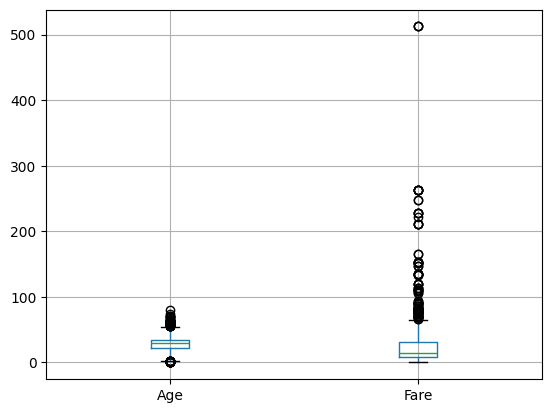

In [24]:
boxplot = df.boxplot(column=['Age','Fare'])

In [25]:
#df.sort_values(by=['Fare'],ascending=False).head(10)

In [26]:
#df = df.drop(df[df['Fare'] > 300].index)

In [27]:
#df['Fare'].max()

In [28]:
#df['Fare'].idxmax()

In [29]:
#df = df.drop(df['Fare'].idxmax(), axis=0)


#df=df.drop(df.index[df['Fare'].idxmax()])

In [30]:
#df[250:260]

In [31]:
#df = df.reset_index(drop=True)

In [32]:
df[250:260]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
250,0,3,29,0,0,7.25,S,0,1
251,0,3,29,1,1,10.46,S,1,0
252,0,1,62,0,0,26.55,S,0,1
253,0,3,30,1,0,16.10,S,0,1
254,0,3,41,0,2,20.21,S,1,0
255,1,3,29,0,2,15.25,C,1,0
256,1,1,29,0,0,79.20,C,1,0
257,1,1,30,0,0,86.50,S,1,0
258,1,1,35,0,0,512.33,C,1,0
259,1,2,50,0,1,26.00,S,1,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    int64  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    889 non-null    object 
 7   Sex_female  891 non-null    int64  
 8   Sex_male    891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


one hot encoding 'Embarcked'

In [34]:
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Sex_female    0
Sex_male      0
dtype: int64

In [35]:
df= pd.get_dummies(df, columns=['Embarked', ])
df["Embarked_C"] = df["Embarked_C"].astype(int)
df["Embarked_Q"] = df["Embarked_Q"].astype(int)
df["Embarked_S"] = df["Embarked_S"].astype(int)
df.head(10)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.25,0,1,0,0,1
1,1,1,38,1,0,71.28,1,0,1,0,0
2,1,3,26,0,0,7.92,1,0,0,0,1
3,1,1,35,1,0,53.10,1,0,0,0,1
4,0,3,35,0,0,8.05,0,1,0,0,1
5,0,3,29,0,0,8.46,0,1,0,1,0
6,0,1,54,0,0,51.86,0,1,0,0,1
7,0,3,2,3,1,21.08,0,1,0,0,1
8,1,3,27,0,2,11.13,1,0,0,0,1
9,1,2,14,1,0,30.07,1,0,1,0,0


In [36]:
df= pd.get_dummies(df, columns=['Pclass', ])
df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22,1,0,7.25,0,1,0,0,1,False,False,True
1,1,38,1,0,71.28,1,0,1,0,0,True,False,False
2,1,26,0,0,7.92,1,0,0,0,1,False,False,True
3,1,35,1,0,53.10,1,0,0,0,1,True,False,False
4,0,35,0,0,8.05,0,1,0,0,1,False,False,True
5,0,29,0,0,8.46,0,1,0,1,0,False,False,True
6,0,54,0,0,51.86,0,1,0,0,1,True,False,False
7,0,2,3,1,21.08,0,1,0,0,1,False,False,True
8,1,27,0,2,11.13,1,0,0,0,1,False,False,True
9,1,14,1,0,30.07,1,0,1,0,0,False,True,False


In [37]:
df["Pclass_1"] = df["Pclass_1"].astype(int)
df["Pclass_2"] = df["Pclass_2"].astype(int)
df["Pclass_3"] = df["Pclass_3"].astype(int)
df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22,1,0,7.25,0,1,0,0,1,0,0,1
1,1,38,1,0,71.28,1,0,1,0,0,1,0,0
2,1,26,0,0,7.92,1,0,0,0,1,0,0,1
3,1,35,1,0,53.10,1,0,0,0,1,1,0,0
4,0,35,0,0,8.05,0,1,0,0,1,0,0,1
5,0,29,0,0,8.46,0,1,0,1,0,0,0,1
6,0,54,0,0,51.86,0,1,0,0,1,1,0,0
7,0,2,3,1,21.08,0,1,0,0,1,0,0,1
8,1,27,0,2,11.13,1,0,0,0,1,0,0,1
9,1,14,1,0,30.07,1,0,1,0,0,0,1,0


In [38]:
df.isna().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

=====================================SCALING================================================

In [39]:
from sklearn.preprocessing import StandardScaler

#df_std_scaler = df.copy()
sc = StandardScaler() # creating an instance of the class object
#df = pd.DataFrame(sc.fit_transform(df), columns=df['Age'])  #fit and transforming StandardScaler the dataframe 
df['Age']= pd.DataFrame(sc.fit_transform(pd.DataFrame(df['Age'])), columns=['Age'])
df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.580044,1,0,7.25,0,1,0,0,1,0,0,1
1,1,0.650112,1,0,71.28,1,0,1,0,0,1,0,0
2,1,-0.272505,0,0,7.92,1,0,0,0,1,0,0,1
3,1,0.419458,1,0,53.10,1,0,0,0,1,1,0,0
4,0,0.419458,0,0,8.05,0,1,0,0,1,0,0,1
5,0,-0.041851,0,0,8.46,0,1,0,1,0,0,0,1
6,0,1.880269,0,0,51.86,0,1,0,0,1,1,0,0
7,0,-2.117740,3,1,21.08,0,1,0,0,1,0,0,1
8,1,-0.195620,0,2,11.13,1,0,0,0,1,0,0,1
9,1,-1.195123,1,0,30.07,1,0,1,0,0,0,1,0


In [40]:

#from sklearn.preprocessing import MinMaxScaler


#m1 = MinMaxScaler() # creating an instance of the class object
#df['Age']= pd.DataFrame(m1.fit_transform(pd.DataFrame(df['Age'])), columns=['Age'])


#df.head(10)

In [41]:
df['Fare']= pd.DataFrame(sc.fit_transform(pd.DataFrame(df['Fare'])), columns=['Fare'])
df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.580044,1,0,-0.502449,0,1,0,0,1,0,0,1
1,1,0.650112,1,0,0.786776,1,0,1,0,0,1,0,0
2,1,-0.272505,0,0,-0.488958,1,0,0,0,1,0,0,1
3,1,0.419458,1,0,0.420727,1,0,0,0,1,1,0,0
4,0,0.419458,0,0,-0.486341,0,1,0,0,1,0,0,1
5,0,-0.041851,0,0,-0.478086,0,1,0,1,0,0,0,1
6,0,1.880269,0,0,0.395760,0,1,0,0,1,1,0,0
7,0,-2.117740,3,1,-0.223986,0,1,0,0,1,0,0,1
8,1,-0.195620,0,2,-0.424326,1,0,0,0,1,0,0,1
9,1,-1.195123,1,0,-0.042975,1,0,1,0,0,0,1,0


In [42]:
df['SibSp']= pd.DataFrame(sc.fit_transform(pd.DataFrame(df['SibSp'])), columns=['SibSp'])
df['Parch']= pd.DataFrame(sc.fit_transform(pd.DataFrame(df['Parch'])), columns=['Parch'])
df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.580044,0.432793,-0.473674,-0.502449,0,1,0,0,1,0,0,1
1,1,0.650112,0.432793,-0.473674,0.786776,1,0,1,0,0,1,0,0
2,1,-0.272505,-0.474545,-0.473674,-0.488958,1,0,0,0,1,0,0,1
3,1,0.419458,0.432793,-0.473674,0.420727,1,0,0,0,1,1,0,0
4,0,0.419458,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
5,0,-0.041851,-0.474545,-0.473674,-0.478086,0,1,0,1,0,0,0,1
6,0,1.880269,-0.474545,-0.473674,0.395760,0,1,0,0,1,1,0,0
7,0,-2.117740,2.247470,0.767630,-0.223986,0,1,0,0,1,0,0,1
8,1,-0.195620,-0.474545,2.008933,-0.424326,1,0,0,0,1,0,0,1
9,1,-1.195123,0.432793,-0.473674,-0.042975,1,0,1,0,0,0,1,0


In [43]:
#m1 = MinMaxScaler() # creating an instance of the class object
#df['Fare']= pd.DataFrame(m1.fit_transform(pd.DataFrame(df['Fare'])), columns=['Fare'])


df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.580044,0.432793,-0.473674,-0.502449,0,1,0,0,1,0,0,1
1,1,0.650112,0.432793,-0.473674,0.786776,1,0,1,0,0,1,0,0
2,1,-0.272505,-0.474545,-0.473674,-0.488958,1,0,0,0,1,0,0,1
3,1,0.419458,0.432793,-0.473674,0.420727,1,0,0,0,1,1,0,0
4,0,0.419458,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
5,0,-0.041851,-0.474545,-0.473674,-0.478086,0,1,0,1,0,0,0,1
6,0,1.880269,-0.474545,-0.473674,0.395760,0,1,0,0,1,1,0,0
7,0,-2.117740,2.247470,0.767630,-0.223986,0,1,0,0,1,0,0,1
8,1,-0.195620,-0.474545,2.008933,-0.424326,1,0,0,0,1,0,0,1
9,1,-1.195123,0.432793,-0.473674,-0.042975,1,0,1,0,0,0,1,0


1. BRUG ROBUST PÅ FARE 
2. DROP 'Cabin'
3. Måske Drop Ticket
4. Ungersøg 'Age'
5. Drop PasserngerID
6. reset index
7. lav boxplot på alle ikke binære

In [44]:
Y = df['Survived'] 
Y.head(10)
Y.info

<bound method Series.info of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

=======================================================================SPLIT DATA SET===================================================
=======================================================================================================================================





In [45]:
len(df)

891

In [46]:
val_df = df.sample(frac=0.2, random_state=1)
len(val_df)

178

In [47]:
val_df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
862,1,1.418960,-0.474545,-0.473674,-0.126332,1,0,0,0,1,1,0,0
223,0,-0.041851,-0.474545,-0.473674,-0.489361,0,1,0,0,1,0,0,1
84,1,-0.964468,-0.474545,-0.473674,-0.437011,1,0,0,0,1,0,1,0
680,0,-0.041851,-0.474545,-0.473674,-0.484529,1,0,0,1,0,0,0,1
535,1,-1.733316,-0.474545,2.008933,-0.119889,1,0,0,0,1,0,1,0
623,0,-0.656929,-0.474545,-0.473674,-0.490368,0,1,0,0,1,0,0,1
148,0,0.496343,-0.474545,2.008933,-0.124923,0,1,0,0,1,0,1,0
3,1,0.419458,0.432793,-0.473674,0.420727,1,0,0,0,1,1,0,0
34,0,-0.118736,0.432793,-0.473674,1.006043,0,1,1,0,0,1,0,0
241,1,-0.041851,0.432793,-0.473674,-0.336337,1,0,0,1,0,0,0,1


In [48]:
df = df.drop(val_df.index)
len(df)

713

In [49]:


train_df = df.sample(frac=0.75, random_state=1)
len(train_df)


535

In [50]:
train_df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
672,0,3.110426,-0.474545,-0.473674,-0.437011,0,1,0,0,1,0,1,0
280,0,2.726002,-0.474545,-0.473674,-0.492381,0,1,0,1,0,0,0,1
496,1,1.880269,0.432793,-0.473674,0.927517,1,0,1,0,0,1,0,0
12,0,-0.733814,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
486,1,0.419458,0.432793,-0.473674,1.163697,1,0,0,0,1,1,0,0
153,0,0.803882,-0.474545,2.008933,-0.356472,0,1,0,0,1,0,0,1
467,0,2.034039,-0.474545,-0.473674,-0.113849,0,1,0,0,1,1,0,0
461,0,0.342573,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
779,1,1.034536,-0.474545,0.767630,3.606841,1,0,0,0,1,1,0,0
856,1,1.188306,0.432793,0.767630,2.671182,1,0,0,0,1,1,0,0


In [51]:

test_df = df.drop(train_df.index)
len(test_df)

178

In [52]:
train_df.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
672,0,3.110426,-0.474545,-0.473674,-0.437011,0,1,0,0,1,0,1,0
280,0,2.726002,-0.474545,-0.473674,-0.492381,0,1,0,1,0,0,0,1
496,1,1.880269,0.432793,-0.473674,0.927517,1,0,1,0,0,1,0,0
12,0,-0.733814,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
486,1,0.419458,0.432793,-0.473674,1.163697,1,0,0,0,1,1,0,0
153,0,0.803882,-0.474545,2.008933,-0.356472,0,1,0,0,1,0,0,1
467,0,2.034039,-0.474545,-0.473674,-0.113849,0,1,0,0,1,1,0,0
461,0,0.342573,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
779,1,1.034536,-0.474545,0.767630,3.606841,1,0,0,0,1,1,0,0
856,1,1.188306,0.432793,0.767630,2.671182,1,0,0,0,1,1,0,0


In [53]:
import numpy as np
np.array([len(val_df) ,len(train_df),len(test_df) ])

array([178, 535, 178])

In [54]:
test =  val_df.iloc[:, 1:2]
test.shape[1]

1

In [55]:
test.shape

(178, 1)

In [56]:
X_val, Y_val = val_df.iloc[:, 1:], val_df.iloc[:, 0:1]

X_train, Y_train = train_df.iloc[:, 1:], train_df.iloc[:, 0:1]

X_test, Y_test = test_df.iloc[:, 1:], test_df.iloc[:, 0:1]

#np.array([len(X_val) ,len(X_train),len(X_test)])

In [57]:
X_train.head(10)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
672,3.110426,-0.474545,-0.473674,-0.437011,0,1,0,0,1,0,1,0
280,2.726002,-0.474545,-0.473674,-0.492381,0,1,0,1,0,0,0,1
496,1.880269,0.432793,-0.473674,0.927517,1,0,1,0,0,1,0,0
12,-0.733814,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
486,0.419458,0.432793,-0.473674,1.163697,1,0,0,0,1,1,0,0
153,0.803882,-0.474545,2.008933,-0.356472,0,1,0,0,1,0,0,1
467,2.034039,-0.474545,-0.473674,-0.113849,0,1,0,0,1,1,0,0
461,0.342573,-0.474545,-0.473674,-0.486341,0,1,0,0,1,0,0,1
779,1.034536,-0.474545,0.767630,3.606841,1,0,0,0,1,1,0,0
856,1.188306,0.432793,0.767630,2.671182,1,0,0,0,1,1,0,0


In [58]:
Y_train.head(10)

,Survived
672,0
280,0
496,1
12,0
486,1
153,0
467,0
461,0
779,1
856,1


In [59]:
X_train.shape

(535, 12)

In [60]:
Y_train.shape

(535, 1)

In [61]:
#np.array([X_train.shape[1],Y_train.shape[1]])

In [62]:
import tensorflow as tf 
tf.keras.backend.clear_session()
with tf.device('/GPU:0'):
    X_train_tensor, Y_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(Y_train, dtype=tf.float32)
    X_test_tensor, Y_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(Y_test, dtype=tf.float32)

2024-01-08 18:40:41.585886: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 18:40:41.585915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 18:40:41.585945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 18:40:41.592211: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/requests/__init__.p

In [63]:
#type(X_train_tensor)

In [64]:
#X_train_tensor.numpy().shape

In [65]:
#X_train_tensor.numpy()

In [66]:
#Y_train_tensor.numpy()

=========================================================================================================================
======================================log loss function =================================================================
=========================================================================================================================

In [67]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import keras
#from keras import initializers

tf.keras.backend.clear_session()

keras.utils.set_random_seed(812)
tf.config.experimental.enable_op_determinism()


#initializers

In [68]:

import wandb, os
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbEvalCallback 

os.environ['WANDB_API_KEY'] = '0596e2acd88f7c5d4be433107f27db2df664e754'


In [69]:
fn_loss = tf.keras.losses.BinaryCrossentropy()

# Initialize wandb with your project name
run = wandb.init(project='Titanic',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0005,   #adam 0.001
                     "momentum": 0.9,
                     "epochs": 50,
                     #"batch_size": 1024,
                     "loss_function":'tf.keras.losses.BinaryCrossentropy()',
                     "architecture": "MLP",
                     #"dataset": "Titanic"
                 })
config = wandb.config  # We'll use this to configure our experiment

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: jcrone. Use `wandb login --relogin` to force relogin


In [70]:

# Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints
wandb_callbacks = [
    WandbMetricsLogger(),
    WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
]

In [71]:
sgd2 = SGD(learning_rate=config.learning_rate, momentum=config.momentum, nesterov=True) #Nesterov Momentum is a technique that can improve the convergence speed of stochastic gradient descent

In [72]:
adam = tf.keras.optimizers.Adam(
    learning_rate=config.learning_rate,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="adam"
)


In [73]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [74]:
tf.debugging.set_log_device_placement(True)

In [75]:


number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(units=64, activation = 'relu', input_dim = number_of_features))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))



model.compile(loss=[fn_loss], optimizer = adam, metrics=[keras.metrics.BinaryAccuracy()]) #keras.metrics.BinaryAccuracy()


In [76]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [77]:
#type(X_train_tensor)

In [78]:
#%%time
# training the model
#model.fit(X_train_tensor, Y_train_tensor, epochs=config.epochs, validation_data=(X_test_tensor,Y_test_tensor), callbacks=wandb_callbacks)  


In [79]:


# Test, Loss and accuracy
#loss, accuracy = model.evaluate(X_test, Y_test)
#print('Loss (Value from loss function) = ',loss)
#print('Accuracy (Depends on [metrics]) = ',accuracy)
     
# With wandb.log, we can easily pass in metrics as key-value pairs.
#wandb.log({'Test Error Rate': round((1 - accuracy) * 100, 2)})

In [80]:
type(X_train)

pandas.core.frame.DataFrame

In [81]:
%%time  
# training the model

model.fit(X_train_tensor, Y_train_tensor, epochs=config.epochs, validation_data=(X_test_tensor,Y_test_tensor), callbacks=wandb_callbacks)

Epoch 1/50


2024-01-08 18:40:48.579575: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-08 18:40:49.823209: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9d9c9cf560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-08 18:40:49.823231: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-01-08 18:40:49.827134: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-08 18:40:49.858489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8906
2024-01-08 18:40:49.914550: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/17 [=====================>........] - ETA: 0s - loss: 0.6866 - binary_accuracy: 0.6202 INFO:tensorflow:Assets written to: my_model_01/assets


INFO:tensorflow:Assets written to: my_model_01/assets
wandb: Adding directory to artifact (./my_model_01)... Done. 0.0s


17/17 [==============================] - 5s 108ms/step - loss: 0.6838 - binary_accuracy: 0.6187 - val_loss: 0.6581 - val_binary_accuracy: 0.6348
Epoch 2/50
10/17 [================>.............] - ETA: 0s - loss: 0.6347 - binary_accuracy: 0.6094INFO:tensorflow:Assets written to: my_model_02/assets


INFO:tensorflow:Assets written to: my_model_02/assets
wandb: Adding directory to artifact (./my_model_02)... Done. 0.0s


17/17 [==============================] - 2s 104ms/step - loss: 0.6166 - binary_accuracy: 0.6150 - val_loss: 0.5090 - val_binary_accuracy: 0.7191
Epoch 3/50
10/17 [================>.............] - ETA: 0s - loss: 0.5121 - binary_accuracy: 0.7875INFO:tensorflow:Assets written to: my_model_03/assets


INFO:tensorflow:Assets written to: my_model_03/assets
wandb: Adding directory to artifact (./my_model_03)... Done. 0.0s


17/17 [==============================] - 1s 89ms/step - loss: 0.5384 - binary_accuracy: 0.7720 - val_loss: 0.5177 - val_binary_accuracy: 0.8315
Epoch 4/50
10/17 [================>.............] - ETA: 0s - loss: 0.5331 - binary_accuracy: 0.7937INFO:tensorflow:Assets written to: my_model_04/assets


INFO:tensorflow:Assets written to: my_model_04/assets
wandb: Adding directory to artifact (./my_model_04)... Done. 0.0s


17/17 [==============================] - 2s 96ms/step - loss: 0.5018 - binary_accuracy: 0.8150 - val_loss: 0.4252 - val_binary_accuracy: 0.8483
Epoch 5/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.4991 - binary_accuracy: 0.7708INFO:tensorflow:Assets written to: my_model_05/assets


INFO:tensorflow:Assets written to: my_model_05/assets
wandb: Adding directory to artifact (./my_model_05)... Done. 0.0s


17/17 [==============================] - 2s 96ms/step - loss: 0.4592 - binary_accuracy: 0.8112 - val_loss: 0.4075 - val_binary_accuracy: 0.8371
Epoch 6/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.4402 - binary_accuracy: 0.8299INFO:tensorflow:Assets written to: my_model_06/assets


INFO:tensorflow:Assets written to: my_model_06/assets
wandb: Adding directory to artifact (./my_model_06)... Done. 0.0s


17/17 [==============================] - 1s 89ms/step - loss: 0.4201 - binary_accuracy: 0.8336 - val_loss: 0.4329 - val_binary_accuracy: 0.8539
Epoch 7/50
10/17 [================>.............] - ETA: 0s - loss: 0.4079 - binary_accuracy: 0.8469INFO:tensorflow:Assets written to: my_model_07/assets


INFO:tensorflow:Assets written to: my_model_07/assets
wandb: Adding directory to artifact (./my_model_07)... Done. 0.0s


17/17 [==============================] - 2s 100ms/step - loss: 0.4034 - binary_accuracy: 0.8467 - val_loss: 0.3918 - val_binary_accuracy: 0.8315
Epoch 8/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3610 - binary_accuracy: 0.8646INFO:tensorflow:Assets written to: my_model_08/assets


INFO:tensorflow:Assets written to: my_model_08/assets
wandb: Adding directory to artifact (./my_model_08)... Done. 0.0s


17/17 [==============================] - 1s 88ms/step - loss: 0.4643 - binary_accuracy: 0.8561 - val_loss: 0.8792 - val_binary_accuracy: 0.8483
Epoch 9/50
17/17 [==============================] - ETA: 0s - loss: 0.5584 - binary_accuracy: 0.8598INFO:tensorflow:Assets written to: my_model_09/assets


INFO:tensorflow:Assets written to: my_model_09/assets
wandb: Adding directory to artifact (./my_model_09)... Done. 0.0s


17/17 [==============================] - 1s 89ms/step - loss: 0.5584 - binary_accuracy: 0.8598 - val_loss: 0.5386 - val_binary_accuracy: 0.8539
Epoch 10/50
11/17 [==================>...........] - ETA: 0s - loss: 0.4032 - binary_accuracy: 0.8352INFO:tensorflow:Assets written to: my_model_10/assets


INFO:tensorflow:Assets written to: my_model_10/assets
wandb: Adding directory to artifact (./my_model_10)... Done. 0.0s


17/17 [==============================] - 1s 87ms/step - loss: 0.3858 - binary_accuracy: 0.8449 - val_loss: 0.5544 - val_binary_accuracy: 0.8483
Epoch 11/50
17/17 [==============================] - ETA: 0s - loss: 0.4144 - binary_accuracy: 0.8636INFO:tensorflow:Assets written to: my_model_11/assets


INFO:tensorflow:Assets written to: my_model_11/assets
wandb: Adding directory to artifact (./my_model_11)... Done. 0.0s


17/17 [==============================] - 2s 110ms/step - loss: 0.4144 - binary_accuracy: 0.8636 - val_loss: 0.3733 - val_binary_accuracy: 0.8596
Epoch 12/50
17/17 [==============================] - ETA: 0s - loss: 0.3857 - binary_accuracy: 0.8505INFO:tensorflow:Assets written to: my_model_12/assets


INFO:tensorflow:Assets written to: my_model_12/assets
wandb: Adding directory to artifact (./my_model_12)... Done. 0.0s


17/17 [==============================] - 1s 93ms/step - loss: 0.3857 - binary_accuracy: 0.8505 - val_loss: 0.3943 - val_binary_accuracy: 0.8258
Epoch 13/50
16/17 [===========================>..] - ETA: 0s - loss: 0.3682 - binary_accuracy: 0.8633INFO:tensorflow:Assets written to: my_model_13/assets


INFO:tensorflow:Assets written to: my_model_13/assets
wandb: Adding directory to artifact (./my_model_13)... Done. 0.0s


17/17 [==============================] - 2s 95ms/step - loss: 0.3649 - binary_accuracy: 0.8654 - val_loss: 0.4695 - val_binary_accuracy: 0.8427
Epoch 14/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3873 - binary_accuracy: 0.8715INFO:tensorflow:Assets written to: my_model_14/assets


INFO:tensorflow:Assets written to: my_model_14/assets
wandb: Adding directory to artifact (./my_model_14)... Done. 0.0s


17/17 [==============================] - 1s 91ms/step - loss: 0.3873 - binary_accuracy: 0.8598 - val_loss: 0.3610 - val_binary_accuracy: 0.8596
Epoch 15/50
 8/17 [=============>................] - ETA: 0s - loss: 0.3610 - binary_accuracy: 0.8711INFO:tensorflow:Assets written to: my_model_15/assets


INFO:tensorflow:Assets written to: my_model_15/assets
wandb: Adding directory to artifact (./my_model_15)... Done. 0.0s


17/17 [==============================] - 2s 101ms/step - loss: 0.3672 - binary_accuracy: 0.8804 - val_loss: 0.4389 - val_binary_accuracy: 0.8483
Epoch 16/50
10/17 [================>.............] - ETA: 0s - loss: 0.3051 - binary_accuracy: 0.8969INFO:tensorflow:Assets written to: my_model_16/assets


INFO:tensorflow:Assets written to: my_model_16/assets
wandb: Adding directory to artifact (./my_model_16)... Done. 0.0s


17/17 [==============================] - 2s 95ms/step - loss: 0.3656 - binary_accuracy: 0.8729 - val_loss: 0.4527 - val_binary_accuracy: 0.8427
Epoch 17/50
 8/17 [=============>................] - ETA: 0s - loss: 0.3123 - binary_accuracy: 0.8867INFO:tensorflow:Assets written to: my_model_17/assets


INFO:tensorflow:Assets written to: my_model_17/assets
wandb: Adding directory to artifact (./my_model_17)... Done. 0.0s


17/17 [==============================] - 1s 84ms/step - loss: 0.3599 - binary_accuracy: 0.8766 - val_loss: 0.4474 - val_binary_accuracy: 0.8483
Epoch 18/50
16/17 [===========================>..] - ETA: 0s - loss: 0.3603 - binary_accuracy: 0.8750INFO:tensorflow:Assets written to: my_model_18/assets


INFO:tensorflow:Assets written to: my_model_18/assets
wandb: Adding directory to artifact (./my_model_18)... Done. 0.0s


17/17 [==============================] - 2s 98ms/step - loss: 0.3565 - binary_accuracy: 0.8766 - val_loss: 0.5147 - val_binary_accuracy: 0.8483
Epoch 19/50
10/17 [================>.............] - ETA: 0s - loss: 0.3104 - binary_accuracy: 0.8875INFO:tensorflow:Assets written to: my_model_19/assets


INFO:tensorflow:Assets written to: my_model_19/assets
wandb: Adding directory to artifact (./my_model_19)... Done. 0.0s


17/17 [==============================] - 2s 98ms/step - loss: 0.3408 - binary_accuracy: 0.8766 - val_loss: 0.3855 - val_binary_accuracy: 0.8427
Epoch 20/50
17/17 [==============================] - ETA: 0s - loss: 0.4294 - binary_accuracy: 0.8411INFO:tensorflow:Assets written to: my_model_20/assets


INFO:tensorflow:Assets written to: my_model_20/assets
wandb: Adding directory to artifact (./my_model_20)... Done. 0.0s


17/17 [==============================] - 2s 98ms/step - loss: 0.4294 - binary_accuracy: 0.8411 - val_loss: 0.3982 - val_binary_accuracy: 0.8371
Epoch 21/50
10/17 [================>.............] - ETA: 0s - loss: 0.3374 - binary_accuracy: 0.8687INFO:tensorflow:Assets written to: my_model_21/assets


INFO:tensorflow:Assets written to: my_model_21/assets
wandb: Adding directory to artifact (./my_model_21)... Done. 0.0s


17/17 [==============================] - 1s 84ms/step - loss: 0.3763 - binary_accuracy: 0.8617 - val_loss: 0.4489 - val_binary_accuracy: 0.8483
Epoch 22/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3775 - binary_accuracy: 0.8785INFO:tensorflow:Assets written to: my_model_22/assets


INFO:tensorflow:Assets written to: my_model_22/assets
wandb: Adding directory to artifact (./my_model_22)... Done. 0.0s


17/17 [==============================] - 2s 95ms/step - loss: 0.3686 - binary_accuracy: 0.8692 - val_loss: 0.3725 - val_binary_accuracy: 0.8539
Epoch 23/50
17/17 [==============================] - ETA: 0s - loss: 0.4951 - binary_accuracy: 0.7832INFO:tensorflow:Assets written to: my_model_23/assets


INFO:tensorflow:Assets written to: my_model_23/assets
wandb: Adding directory to artifact (./my_model_23)... Done. 0.0s


17/17 [==============================] - 2s 102ms/step - loss: 0.4951 - binary_accuracy: 0.7832 - val_loss: 0.5327 - val_binary_accuracy: 0.7921
Epoch 24/50
12/17 [====================>.........] - ETA: 0s - loss: 0.5769 - binary_accuracy: 0.7917INFO:tensorflow:Assets written to: my_model_24/assets


INFO:tensorflow:Assets written to: my_model_24/assets
wandb: Adding directory to artifact (./my_model_24)... Done. 0.0s


17/17 [==============================] - 1s 88ms/step - loss: 0.5544 - binary_accuracy: 0.8056 - val_loss: 0.5001 - val_binary_accuracy: 0.8315
Epoch 25/50
17/17 [==============================] - ETA: 0s - loss: 0.4507 - binary_accuracy: 0.8393INFO:tensorflow:Assets written to: my_model_25/assets


INFO:tensorflow:Assets written to: my_model_25/assets
wandb: Adding directory to artifact (./my_model_25)... Done. 0.0s


17/17 [==============================] - 1s 89ms/step - loss: 0.4507 - binary_accuracy: 0.8393 - val_loss: 0.3876 - val_binary_accuracy: 0.8427
Epoch 26/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3914 - binary_accuracy: 0.8542INFO:tensorflow:Assets written to: my_model_26/assets


INFO:tensorflow:Assets written to: my_model_26/assets
wandb: Adding directory to artifact (./my_model_26)... Done. 0.0s


17/17 [==============================] - 1s 89ms/step - loss: 0.3911 - binary_accuracy: 0.8561 - val_loss: 0.3906 - val_binary_accuracy: 0.8483
Epoch 27/50
12/17 [====================>.........] - ETA: 0s - loss: 0.3637 - binary_accuracy: 0.8568INFO:tensorflow:Assets written to: my_model_27/assets


INFO:tensorflow:Assets written to: my_model_27/assets
wandb: Adding directory to artifact (./my_model_27)... Done. 0.0s


17/17 [==============================] - 2s 104ms/step - loss: 0.3678 - binary_accuracy: 0.8523 - val_loss: 0.4420 - val_binary_accuracy: 0.8483
Epoch 28/50
11/17 [==================>...........] - ETA: 0s - loss: 0.3609 - binary_accuracy: 0.8636INFO:tensorflow:Assets written to: my_model_28/assets


INFO:tensorflow:Assets written to: my_model_28/assets
wandb: Adding directory to artifact (./my_model_28)... Done. 0.0s


17/17 [==============================] - 1s 85ms/step - loss: 0.3540 - binary_accuracy: 0.8636 - val_loss: 0.4376 - val_binary_accuracy: 0.8483
Epoch 29/50
17/17 [==============================] - ETA: 0s - loss: 0.3509 - binary_accuracy: 0.8692INFO:tensorflow:Assets written to: my_model_29/assets


INFO:tensorflow:Assets written to: my_model_29/assets
wandb: Adding directory to artifact (./my_model_29)... Done. 0.0s


17/17 [==============================] - 1s 91ms/step - loss: 0.3509 - binary_accuracy: 0.8692 - val_loss: 0.5349 - val_binary_accuracy: 0.8483
Epoch 30/50
 7/17 [===========>..................] - ETA: 0s - loss: 0.3009 - binary_accuracy: 0.8929INFO:tensorflow:Assets written to: my_model_30/assets


INFO:tensorflow:Assets written to: my_model_30/assets
wandb: Adding directory to artifact (./my_model_30)... Done. 0.0s


17/17 [==============================] - 1s 86ms/step - loss: 0.3455 - binary_accuracy: 0.8748 - val_loss: 0.5100 - val_binary_accuracy: 0.8539
Epoch 31/50
 7/17 [===========>..................] - ETA: 0s - loss: 0.3980 - binary_accuracy: 0.8348INFO:tensorflow:Assets written to: my_model_31/assets


INFO:tensorflow:Assets written to: my_model_31/assets
wandb: Adding directory to artifact (./my_model_31)... Done. 0.0s


17/17 [==============================] - 2s 96ms/step - loss: 0.3493 - binary_accuracy: 0.8729 - val_loss: 0.4400 - val_binary_accuracy: 0.8483
Epoch 32/50
13/17 [=====================>........] - ETA: 0s - loss: 0.3495 - binary_accuracy: 0.8702INFO:tensorflow:Assets written to: my_model_32/assets


INFO:tensorflow:Assets written to: my_model_32/assets
wandb: Adding directory to artifact (./my_model_32)... Done. 0.0s


17/17 [==============================] - 2s 97ms/step - loss: 0.3342 - binary_accuracy: 0.8766 - val_loss: 0.5988 - val_binary_accuracy: 0.8427
Epoch 33/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3298 - binary_accuracy: 0.8785INFO:tensorflow:Assets written to: my_model_33/assets


INFO:tensorflow:Assets written to: my_model_33/assets
wandb: Adding directory to artifact (./my_model_33)... Done. 0.0s


17/17 [==============================] - 2s 93ms/step - loss: 0.3383 - binary_accuracy: 0.8748 - val_loss: 0.4294 - val_binary_accuracy: 0.8539
Epoch 34/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3401 - binary_accuracy: 0.8681INFO:tensorflow:Assets written to: my_model_34/assets


INFO:tensorflow:Assets written to: my_model_34/assets
wandb: Adding directory to artifact (./my_model_34)... Done. 0.0s


17/17 [==============================] - 1s 84ms/step - loss: 0.3299 - binary_accuracy: 0.8766 - val_loss: 0.5284 - val_binary_accuracy: 0.8483
Epoch 35/50
12/17 [====================>.........] - ETA: 0s - loss: 0.3108 - binary_accuracy: 0.8802INFO:tensorflow:Assets written to: my_model_35/assets


INFO:tensorflow:Assets written to: my_model_35/assets
wandb: Adding directory to artifact (./my_model_35)... Done. 0.0s


17/17 [==============================] - 1s 86ms/step - loss: 0.3218 - binary_accuracy: 0.8804 - val_loss: 0.5798 - val_binary_accuracy: 0.8483
Epoch 36/50
11/17 [==================>...........] - ETA: 0s - loss: 0.2838 - binary_accuracy: 0.9006INFO:tensorflow:Assets written to: my_model_36/assets


INFO:tensorflow:Assets written to: my_model_36/assets
wandb: Adding directory to artifact (./my_model_36)... Done. 0.0s


17/17 [==============================] - 2s 98ms/step - loss: 0.3211 - binary_accuracy: 0.8785 - val_loss: 0.5879 - val_binary_accuracy: 0.8483
Epoch 37/50
 7/17 [===========>..................] - ETA: 0s - loss: 0.3307 - binary_accuracy: 0.8795INFO:tensorflow:Assets written to: my_model_37/assets


INFO:tensorflow:Assets written to: my_model_37/assets
wandb: Adding directory to artifact (./my_model_37)... Done. 0.0s


17/17 [==============================] - 2s 94ms/step - loss: 0.3195 - binary_accuracy: 0.8822 - val_loss: 0.4484 - val_binary_accuracy: 0.8483
Epoch 38/50
11/17 [==================>...........] - ETA: 0s - loss: 0.3157 - binary_accuracy: 0.8750INFO:tensorflow:Assets written to: my_model_38/assets


INFO:tensorflow:Assets written to: my_model_38/assets
wandb: Adding directory to artifact (./my_model_38)... Done. 0.0s


17/17 [==============================] - 1s 86ms/step - loss: 0.3181 - binary_accuracy: 0.8766 - val_loss: 0.5969 - val_binary_accuracy: 0.8483
Epoch 39/50
11/17 [==================>...........] - ETA: 0s - loss: 0.3117 - binary_accuracy: 0.8892INFO:tensorflow:Assets written to: my_model_39/assets


INFO:tensorflow:Assets written to: my_model_39/assets
wandb: Adding directory to artifact (./my_model_39)... Done. 0.0s


17/17 [==============================] - 2s 96ms/step - loss: 0.3125 - binary_accuracy: 0.8804 - val_loss: 0.5898 - val_binary_accuracy: 0.8483
Epoch 40/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3233 - binary_accuracy: 0.8854INFO:tensorflow:Assets written to: my_model_40/assets


INFO:tensorflow:Assets written to: my_model_40/assets
wandb: Adding directory to artifact (./my_model_40)... Done. 0.0s


17/17 [==============================] - 2s 110ms/step - loss: 0.3094 - binary_accuracy: 0.8804 - val_loss: 0.6098 - val_binary_accuracy: 0.8483
Epoch 41/50
 8/17 [=============>................] - ETA: 0s - loss: 0.2933 - binary_accuracy: 0.8984INFO:tensorflow:Assets written to: my_model_41/assets


INFO:tensorflow:Assets written to: my_model_41/assets
wandb: Adding directory to artifact (./my_model_41)... Done. 0.0s


17/17 [==============================] - 5s 308ms/step - loss: 0.3050 - binary_accuracy: 0.8841 - val_loss: 0.6231 - val_binary_accuracy: 0.8539
Epoch 42/50
10/17 [================>.............] - ETA: 0s - loss: 0.3277 - binary_accuracy: 0.8750INFO:tensorflow:Assets written to: my_model_42/assets


INFO:tensorflow:Assets written to: my_model_42/assets
wandb: Adding directory to artifact (./my_model_42)... Done. 0.0s


17/17 [==============================] - 2s 102ms/step - loss: 0.3061 - binary_accuracy: 0.8822 - val_loss: 0.7223 - val_binary_accuracy: 0.8539
Epoch 43/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3525 - binary_accuracy: 0.8854INFO:tensorflow:Assets written to: my_model_43/assets


INFO:tensorflow:Assets written to: my_model_43/assets
wandb: Adding directory to artifact (./my_model_43)... Done. 0.0s


17/17 [==============================] - 1s 90ms/step - loss: 0.3524 - binary_accuracy: 0.8822 - val_loss: 0.6847 - val_binary_accuracy: 0.8539
Epoch 44/50
12/17 [====================>.........] - ETA: 0s - loss: 0.3251 - binary_accuracy: 0.8724INFO:tensorflow:Assets written to: my_model_44/assets


INFO:tensorflow:Assets written to: my_model_44/assets
wandb: Adding directory to artifact (./my_model_44)... Done. 0.0s


17/17 [==============================] - 2s 100ms/step - loss: 0.3119 - binary_accuracy: 0.8822 - val_loss: 0.6204 - val_binary_accuracy: 0.8315
Epoch 45/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3637 - binary_accuracy: 0.8819INFO:tensorflow:Assets written to: my_model_45/assets


INFO:tensorflow:Assets written to: my_model_45/assets
wandb: Adding directory to artifact (./my_model_45)... Done. 0.0s


17/17 [==============================] - 1s 88ms/step - loss: 0.3353 - binary_accuracy: 0.8748 - val_loss: 0.5884 - val_binary_accuracy: 0.8596
Epoch 46/50
11/17 [==================>...........] - ETA: 0s - loss: 0.2800 - binary_accuracy: 0.8977INFO:tensorflow:Assets written to: my_model_46/assets


INFO:tensorflow:Assets written to: my_model_46/assets
wandb: Adding directory to artifact (./my_model_46)... Done. 0.0s


17/17 [==============================] - 2s 95ms/step - loss: 0.2966 - binary_accuracy: 0.8860 - val_loss: 0.6240 - val_binary_accuracy: 0.8483
Epoch 47/50
11/17 [==================>...........] - ETA: 0s - loss: 0.2776 - binary_accuracy: 0.8920INFO:tensorflow:Assets written to: my_model_47/assets


INFO:tensorflow:Assets written to: my_model_47/assets
wandb: Adding directory to artifact (./my_model_47)... Done. 0.0s


17/17 [==============================] - 2s 102ms/step - loss: 0.2898 - binary_accuracy: 0.8897 - val_loss: 0.6229 - val_binary_accuracy: 0.8539
Epoch 48/50
 9/17 [==============>...............] - ETA: 0s - loss: 0.3246 - binary_accuracy: 0.8611INFO:tensorflow:Assets written to: my_model_48/assets


INFO:tensorflow:Assets written to: my_model_48/assets
wandb: Adding directory to artifact (./my_model_48)... Done. 0.0s


17/17 [==============================] - 2s 113ms/step - loss: 0.2892 - binary_accuracy: 0.8879 - val_loss: 0.7044 - val_binary_accuracy: 0.8539
Epoch 49/50
10/17 [================>.............] - ETA: 0s - loss: 0.3232 - binary_accuracy: 0.8969INFO:tensorflow:Assets written to: my_model_49/assets


INFO:tensorflow:Assets written to: my_model_49/assets
wandb: Adding directory to artifact (./my_model_49)... Done. 0.0s


17/17 [==============================] - 1s 88ms/step - loss: 0.3230 - binary_accuracy: 0.8897 - val_loss: 0.4720 - val_binary_accuracy: 0.8483
Epoch 50/50
17/17 [==============================] - ETA: 0s - loss: 0.2919 - binary_accuracy: 0.8879INFO:tensorflow:Assets written to: my_model_50/assets


INFO:tensorflow:Assets written to: my_model_50/assets
wandb: Adding directory to artifact (./my_model_50)... Done. 0.0s


17/17 [==============================] - 1s 89ms/step - loss: 0.2919 - binary_accuracy: 0.8879 - val_loss: 0.7328 - val_binary_accuracy: 0.8427
CPU times: user 1min 7s, sys: 1.22 s, total: 1min 8s
Wall time: 1min 23s


In [84]:


# Test, Loss and accuracy
loss, accuracy = model.evaluate(X_val, Y_val)
print('Loss (Value from loss function) = ',loss)
print('Accuracy (Depends on [metrics]) = ',accuracy)
     
# With wandb.log, we can easily pass in metrics as key-value pairs.
wandb.log({'Test Error Rate': round((1 - accuracy) * 100, 2)})

6/6 [==============================] - 0s 3ms/step - loss: 0.7668 - binary_accuracy: 0.7809
Loss (Value from loss function) =  0.7668408155441284
Accuracy (Depends on [metrics]) =  0.7808988690376282


Error: You must call wandb.init() before wandb.log()

In [83]:
run.finish()

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Test Error Rate,▁
epoch/binary_accuracy,▁▁▅▆▇▇▇▇▇▇▇▇████▇▇▅▆▇▇▇▇████████████████
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▅▅▃▃▄▆▃▃▂▃▂▂▂▂▃▂▅▆▃▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁
epoch/val_binary_accuracy,▁▄▇██▇███▇▇█▇██▇██▆▇█████▇█████████▇███▇
epoch/val_loss,▅▃▃▂▂▁█▃▁▁▂▁▂▂▃▁▂▁▃▃▁▂▂▃▂▄▂▃▄▂▄▄▅▆▅▅▅▅▆▆
Test Error Rate,15.73
epoch/binary_accuracy,0.88785
epoch/epoch,49
epoch/learning_rate,0.0005
